In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


**Step 1: Import Necessary Libraries**

We will start by importing the necessary libraries.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

**Step 2: Load the Dataset**

Next, we will load the dataset using pandas.

In [3]:
data=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Step 3: Separate Features and Target Variable**

We need to separate the features (input variables) and the target variable (output variable).

In [6]:
# Separate features and target variable
X = data.drop(columns=['SalePrice', 'Id'])
y = data['SalePrice']

**Step 4: Identify Numerical and Categorical Columns**

We need to identify which columns are numerical and which are categorical.

In [7]:
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

Numerical columns: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')
Categorical columns: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'


**Step 5: Handle Missing Values**

For simplicity, we will fill missing values in numerical columns with the median value and in categorical columns with the most frequent value.

In [8]:
# Fill missing values in numerical columns with median
for col in numerical_cols:
    X[col].fillna(X[col].median(), inplace=True)

# Fill missing values in categorical columns with the most frequent value
for col in categorical_cols:
    X[col].fillna(X[col].mode()[0], inplace=True)

/tmp/ipykernel_291/3287129032.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].median(), inplace=True)
/tmp/ipykernel_291/3287129032.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

**Step 6: Encode Categorical Variables**

We need to convert categorical variables into numerical values using one-hot encoding.

In [9]:
# One-hot encode categorical variables
X = pd.get_dummies(X, columns=categorical_cols)

In [10]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,True,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,True,False,False,False,False,True,False


**Step 7: Split the Data into Training and Test Sets**

We will split the dataset into training and test sets to evaluate the performance of our machine learning model.

In [11]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (1168, 287)
Test data shape: (292, 287)


With these steps, we have preprocessed our dataset and it's now ready for training a machine learning model.

**Model building**

Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9444672793102756

In [13]:
model.score(X_test, y_test)

-19581800.77098559

In [14]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

1.3522898505528578e+17

In [15]:
# # write code to draw a decision tree
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt

# model = DecisionTreeRegressor()
# model.fit(X_train, y_train)
# print(model.score(X_train, y_train))
# print(model.score(X_test, y_test))
# plt.figure(figsize=(20, 10))
# plot_tree(model, feature_names=X.columns, filled=True)
# plt.show()

0.7441195561260132
0.6761922742379713


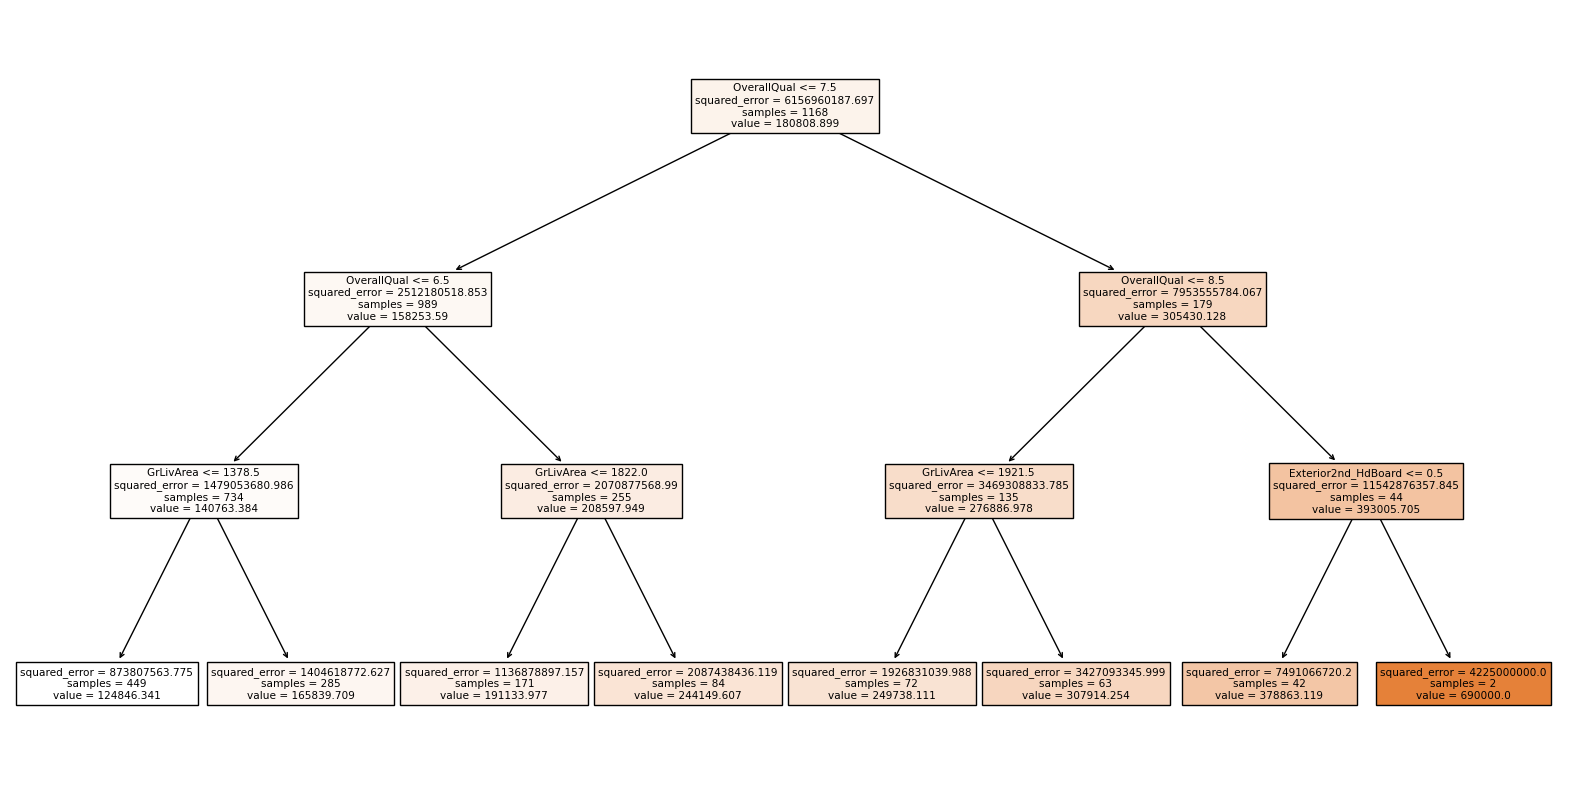

In [16]:
# write code to draw a decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()

0.8480238893464334
0.7709194590226451


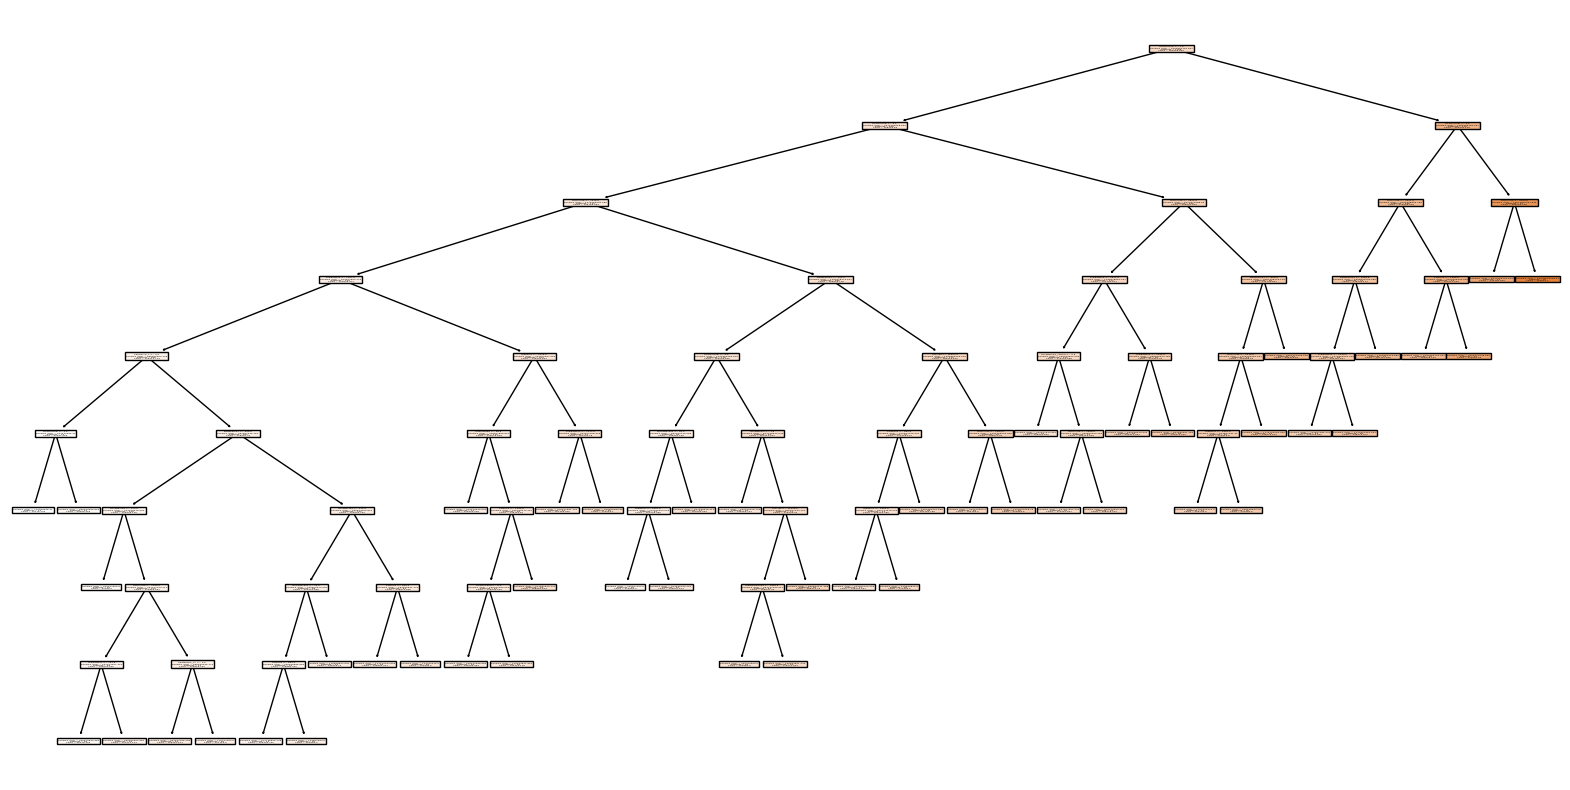

In [17]:
# write code to draw a decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

model = DecisionTreeRegressor(min_samples_leaf=20)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()


**Random Forest**

In [18]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
print(model_rf.score(X_train, y_train))
print(model_rf.score(X_test, y_test))

y_pred_rf = model_rf.predict(X_test)
mean_squared_error(y_test, y_pred_rf)

0.9807910466963754
0.8399494805980026


1105284873.6510363

In [19]:
y_pred = model_rf.predict(X_test)
mean_squared_error(y_test, y_pred)

1105284873.6510363

In [20]:
model_rf = RandomForestRegressor(n_estimators=100,min_samples_leaf=5,max_depth=5, random_state=42)
model_rf.fit(X_train, y_train)
print(model.score(X_train, y_train))
model_rf.score(X_test, y_test)

0.8480238893464334


0.8017679513951294

We can use Random Forest to get the featur importance of the dataset.

In [21]:
# get the feature importances 
model_rf.feature_importances_

array([5.09304673e-04, 1.42603512e-03, 8.14698409e-03, 6.50915263e-01,
       1.67711767e-03, 7.26364809e-03, 3.43080073e-03, 8.01415790e-03,
       2.91024442e-02, 0.00000000e+00, 2.57648814e-03, 4.00250529e-02,
       2.07586382e-02, 2.04810736e-03, 0.00000000e+00, 1.22468550e-01,
       1.83592227e-04, 0.00000000e+00, 5.84767592e-03, 5.46545516e-04,
       2.57739560e-03, 7.19867275e-04, 4.39838111e-03, 4.78611586e-03,
       1.12309183e-03, 2.76266088e-02, 1.84200194e-02, 1.97401854e-03,
       1.77792251e-03, 7.55147907e-05, 0.00000000e+00, 1.24225918e-04,
       0.00000000e+00, 0.00000000e+00, 2.05220404e-03, 3.01055476e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.59112730e-04,
       8.94512110e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.00781271e-04, 0.00000000e+00, 0.00000000e+00,
       1.92511212e-03, 0.00000000e+00, 0.00000000e+00, 5.54157352e-05,
       1.32650110e-04, 0.00000000e+00, 0.00000000e+00, 5.41106502e-05,
      

<Axes: >

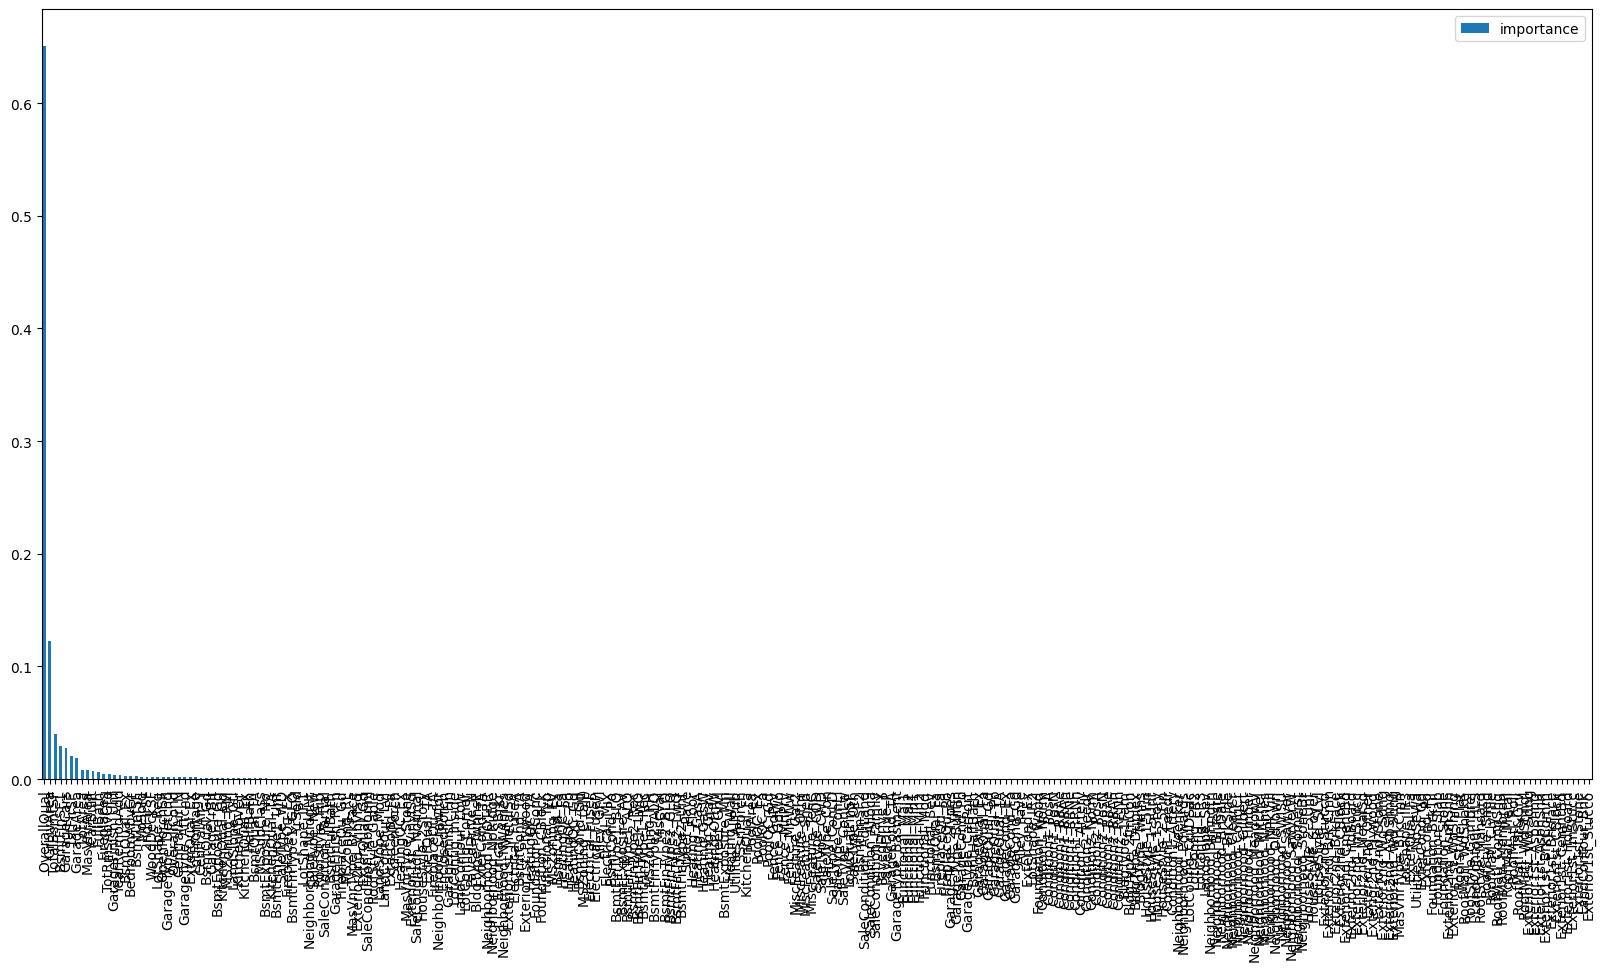

In [22]:
# get the feature importances in a dataframe and plot a bar plot
feature_importances = pd.DataFrame(model_rf.feature_importances_, index=X.columns, columns=['importance'])
feature_importances = feature_importances.sort_values('importance', ascending=False)
feature_importances.plot(kind='bar', figsize=(20, 10))

<Axes: >

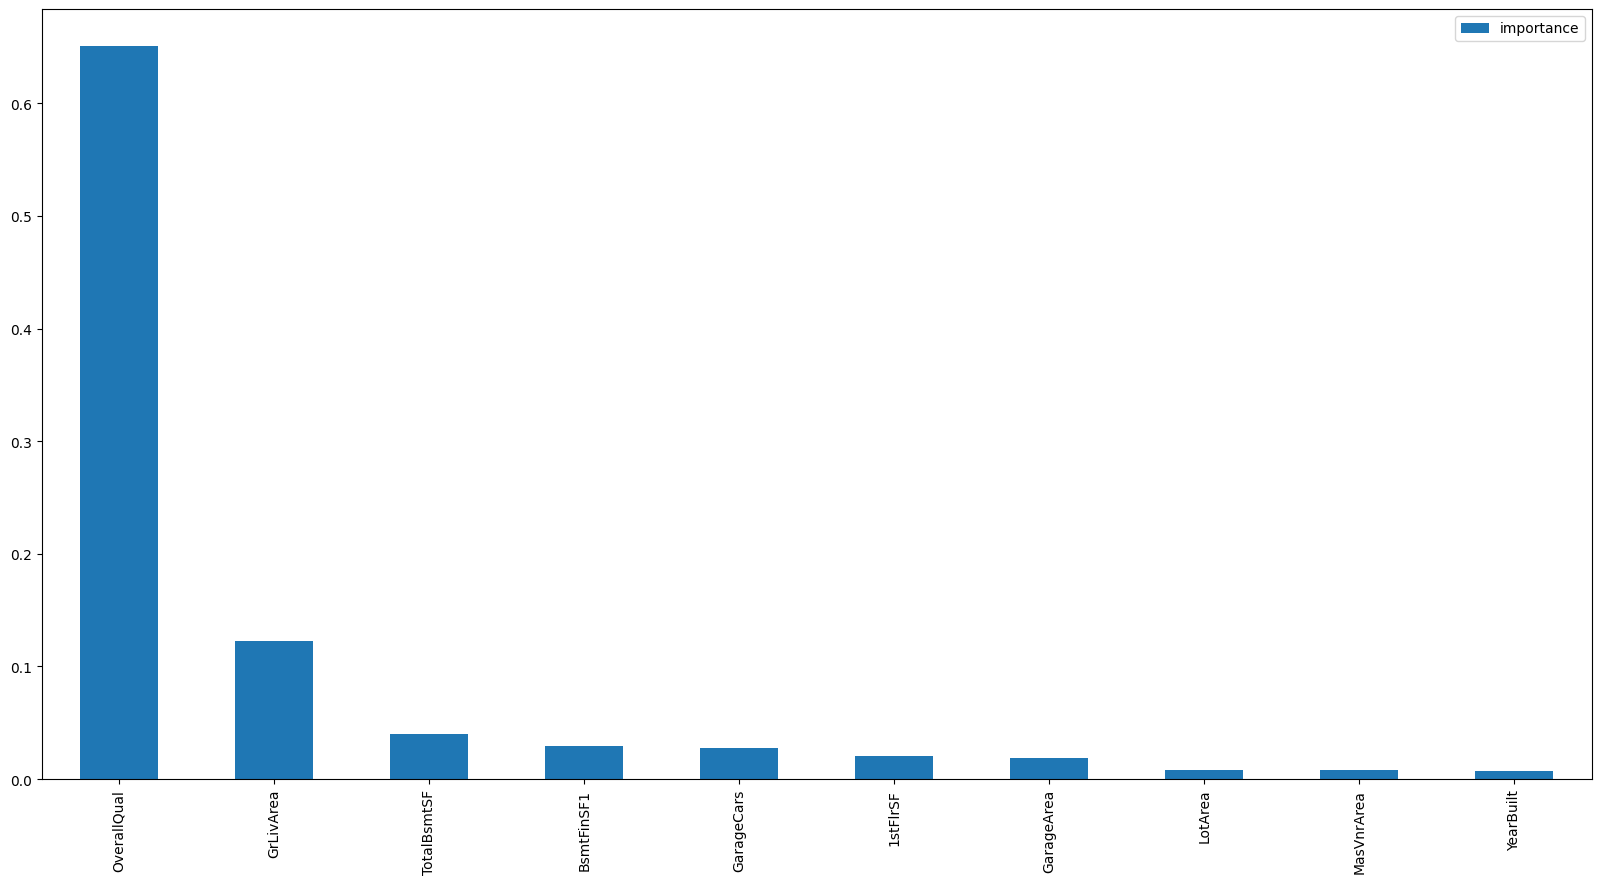

In [23]:
# Select only the top 10 features and plot them
top_features = feature_importances.head(10)
top_features.plot(kind='bar', figsize=(20, 10))

<Axes: >

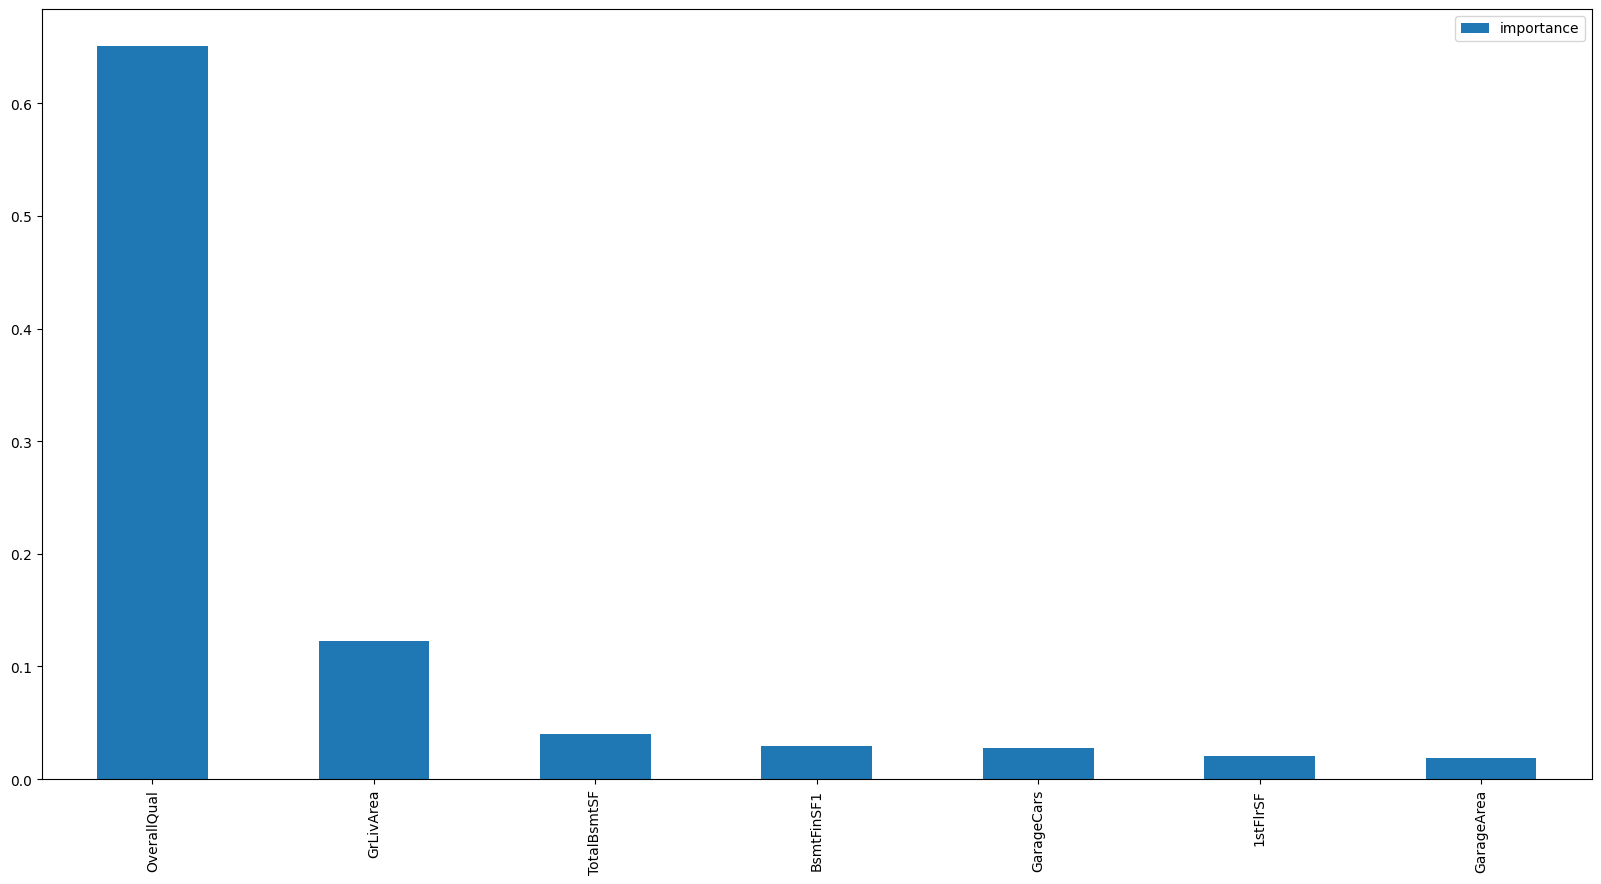

In [24]:
# select only important columns from feature_importances
selected_features = feature_importances[feature_importances['importance'] > 0.01].index
# now plot them in a bar plot
feature_importances.loc[selected_features].plot(kind='bar', figsize=(20, 10))

In [25]:
# now train with only top 10 features and calcualte score and rmse
X_train_selected = X_train[top_features.index]
X_test_selected = X_test[top_features.index]

model_rf = RandomForestRegressor()
model_rf.fit(X_train_selected, y_train)
print(model_rf.score(X_train_selected, y_train))
print(model_rf.score(X_test_selected, y_test))

y_pred = model_rf.predict(X_test_selected)
mean_squared_error(y_test, y_pred)

0.9792255667529198
0.8278378285558339


1188926125.47047

**Improving performance**

In [26]:
# improve the performance of model by tuning hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 5]
}

model_rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   1.4s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   1.4s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   1.4s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   1.5s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   1.6s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   3.0s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   3.0s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   3.1s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   3.0s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   2.8s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=300; total time=   4.3s
[CV] END ..max_depth=5, min_samples_leaf=1, n_e

{'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 200}

In [27]:
# now build a forest with the best parameters
model_rf = RandomForestRegressor(n_estimators=200, max_depth=15, min_samples_leaf=1, random_state=42)
model_rf.fit(X_train, y_train)
print(model_rf.score(X_train, y_train))
print(model_rf.score(X_test, y_test))

y_pred = model_rf.predict(X_test)
mean_squared_error(y_test, y_pred)

0.9800849648354027
0.8419009171786733


1091808545.4106557

In [28]:
# now build a forest with the best parameters
model_rf = RandomForestRegressor(n_estimators=226, max_depth=10, min_samples_leaf=1, random_state=42)
model_rf.fit(X_train, y_train)
print(model_rf.score(X_train, y_train))
print(model_rf.score(X_test, y_test))

y_pred = model_rf.predict(X_test)
mean_squared_error(y_test, y_pred)

0.975899353148236
0.839722769297579


1106850507.876905

**Using RandomSearchCV**

In [29]:
# using random search for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(5, 20),
    'min_samples_leaf': randint(1, 10)
}

model_rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=model_rf, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)

random_search.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .max_depth=10, min_samples_leaf=8, n_estimators=331; total time=   5.9s
[CV] END .max_depth=10, min_samples_leaf=8, n_estimators=331; total time=   5.9s
[CV] END .max_depth=10, min_samples_leaf=8, n_estimators=331; total time=   5.9s
[CV] END .max_depth=10, min_samples_leaf=8, n_estimators=331; total time=   6.0s
[CV] END ..max_depth=9, min_samples_leaf=3, n_estimators=116; total time=   2.5s
[CV] END ..max_depth=9, min_samples_leaf=3, n_estimators=116; total time=   2.5s
[CV] END ..max_depth=9, min_samples_leaf=3, n_estimators=116; total time=   2.5s
[CV] END ..max_depth=9, min_samples_leaf=3, n_estimators=116; total time=   2.5s
[CV] END ..max_depth=9, min_samples_leaf=3, n_estimators=116; total time=   2.5s
[CV] END .max_depth=10, min_samples_leaf=8, n_estimators=331; total time=   5.9s
[CV] END .max_depth=15, min_samples_leaf=3, n_estimators=198; total time=   4.8s
[CV] END .max_depth=15, min_samples_leaf=3, n_e

{'max_depth': 14, 'min_samples_leaf': 1, 'n_estimators': 172}

In [30]:
# # Use LabelEncoder to convert categorical variables to numerical
# from sklearn.preprocessing import LabelEncoder
# # Load the dataset
# file_path = 'house_train.csv'
# data = pd.read_csv(file_path)

# # Separate features and target variable
# X = data.drop(columns=['SalePrice', 'Id'])
# y = data['SalePrice']

# # Fill missing values in numerical columns with median
# for col in numerical_cols:
#     X[col].fillna(X[col].median(), inplace=True)

# label_encoder = LabelEncoder()
# for col in categorical_cols:
#     X[col] = label_encoder.fit_transform(X[col])
    

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# print(f"Training data shape: {X_train.shape}")
# print(f"Test data shape: {X_test.shape}")

# model_rf = RandomForestRegressor(n_estimators=20, min_samples_leaf=3, random_state=42)
# model_rf.fit(X_train, y_train)
# print(model_rf.score(X_train, y_train))
# model_rf.score(X_test, y_test)